## Gather

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import requests 
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

In [2]:
arch_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Download required data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f1:
        f1.write(response.content)

In [4]:
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
# twitter_api.py
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = arch_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# extract required data from tweet_json.txt
with open('tweet-json.txt', 'r') as f2:
    lines = f2.readlines()
    
api_dict_list = []
for line in lines:
    res = json.loads(line)
    dic = {'tweet_id': res['id'], 'retweet_count': res['retweet_count'], 'favorite_count' : res['favorite_count'], 'retweeted' : res['retweeted']}
    api_dict_list.append(dic)

api_df = pd.DataFrame(api_dict_list)

## Assess

In [6]:
arch_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
arch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
arch_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1880,675006312288268288,NaN,NaN,2015-12-10 17:37:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mollie. This pic was taken after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675006312...,10,10,Mollie,None,None,pupper,None
644,793180763617361921,NaN,NaN,2016-10-31 20:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Newt. He's a strawberry. 11/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793180763...,11,10,Newt,None,None,None,None
491,813800681631023104,NaN,NaN,2016-12-27 17:36:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sky. She's learning how to roll her R'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813800681...,12,10,Sky,None,None,None,None
1892,674754018082705410,6.747522e+17,4.196984e+09,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just received another perfect photo of dogs an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674754018...,12,10,None,None,None,None,None
1292,708109389455101952,NaN,NaN,2016-03-11 01:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He was caught off guard by ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708109389...,10,10,Remington,None,None,None,None


In [10]:
arch_df.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Daisy          7
an             7
Buddy          7
Toby           7
Koda           6
Oscar          6
Milo           6
Jax            6
Dave           6
Leo            6
Bella          6
Scout          6
Rusty          6
Jack           6
Stanley        6
Phil           5
            ... 
Andy           1
Traviss        1
Vinnie         1
Gustav         1
Ember          1
Lambeau        1
Godi           1
Dudley         1
Alejandro      1
Mack           1
Grady          1
Saydee         1
Norman         1
Farfle         1
Boston         1
Blipson        1
this           1
Pinot          1
Pherb          1
Socks          1
Carper         1
Jessiga        1
Philippe       1
Molly          1
Tito           1
Rumble         1
Jeremy         1
Gert          

In [11]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
image_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [15]:
api_df

,favorite_count,retweet_count,retweeted,tweet_id
0,39467,8853,False,892420643555336193
1,33819,6514,False,892177421306343426
2,25461,4328,False,891815181378084864
3,42908,8964,False,891689557279858688
4,41048,9774,False,891327558926688256
5,20562,3261,False,891087950875897856
6,12041,2158,False,890971913173991426
7,56848,16716,False,890729181411237888
8,28226,4429,False,890609185150312448
9,32467,7711,False,890240255349198849


In [16]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweeted         2354 non-null bool
tweet_id          2354 non-null int64
dtypes: bool(1), int64(3)
memory usage: 57.5 KB


In [17]:
api_df.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


#### Quality
##### `archive` table
- Timestamp data has "+0000" in the end
- Erroneous datatype timestamp column
- Source links are within <a href="" 
- Wrong dog names like a and an
- Unwanted retweets, replies and tweets without photos data
- "None" representation for the null value in dog name and stage columns
- Wrong rating for the tweet id = 786709082849828864
- Rating denominator inconsistency

#### Tidiness
- One variable in four columns in `archive` table (doggo, floofer, pupper and puppo)
- columns hearders are values in `image` table
- `image` table data and `api` table data should be part of the `archive` table

## Clean

In [18]:
arch_clean = arch_df.copy()
image_clean = image_df.copy()
api_clean = api_df.copy()

### Unwanted Data

#### `archive`: Unwanted retweets, replies and tweets without photos data

##### Define
drop data where expanded_url is null, retweets columns data isn't null or replies columns data isn't null then drop these nan columns

##### Code

In [19]:
arch_clean = arch_clean[arch_clean.in_reply_to_status_id.isnull()]
arch_clean = arch_clean[arch_clean.retweeted_status_id.isnull()]
arch_clean = arch_clean[arch_clean.expanded_urls.notnull()]
arch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [20]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


#### `arch`: the tweets beyond August 1st, 2017 with no image predictions data

##### Define
remove the "+0000" in the end and convert the data to time then drop the data beyond August 1st, 2017

##### Code

In [21]:
arch_clean.timestamp = arch_clean.timestamp.str[:-6]
arch_clean.timestamp = pd.to_datetime(arch_clean.timestamp)
arch_clean = arch_clean.query('timestamp < "2017-08-02"')

##### Test

In [22]:
arch_clean.timestamp.sort_values()

2355   2015-11-15 22:32:08
2354   2015-11-15 23:05:30
2353   2015-11-15 23:21:54
2352   2015-11-16 00:04:52
2351   2015-11-16 00:24:50
2350   2015-11-16 00:30:50
2349   2015-11-16 00:35:11
2348   2015-11-16 00:49:46
2347   2015-11-16 00:55:59
2346   2015-11-16 01:01:59
2345   2015-11-16 01:22:45
2344   2015-11-16 01:52:02
2343   2015-11-16 01:59:36
2342   2015-11-16 02:38:37
2341   2015-11-16 03:22:39
2340   2015-11-16 03:44:34
2339   2015-11-16 03:55:04
2338   2015-11-16 04:02:55
2337   2015-11-16 14:57:41
2336   2015-11-16 15:14:19
2335   2015-11-16 16:11:11
2334   2015-11-16 16:37:02
2333   2015-11-16 19:31:45
2332   2015-11-16 20:01:42
2331   2015-11-16 20:32:58
2330   2015-11-16 21:10:36
2329   2015-11-16 21:54:18
2328   2015-11-16 23:23:41
2327   2015-11-17 00:06:54
2326   2015-11-17 00:24:19
               ...        
31     2017-07-15 16:17:19
29     2017-07-15 23:25:31
28     2017-07-16 20:14:00
27     2017-07-16 23:58:41
26     2017-07-17 16:17:36
25     2017-07-18 00:07:08
2

### Tidiness

#### One variable in four columns in `archive` table (doggo, floofer, pupper and puppo) and "None" representation for the null value in dog stage columns

##### Define
convert "None" to "" and add the columns together in dog stage column

##### Code

In [23]:
arch_clean.doggo = arch_clean.doggo.str.replace("None", "")
arch_clean.floofer = arch_clean.floofer.str.replace("None", "")
arch_clean.pupper = arch_clean.pupper.str.replace("None", "")
arch_clean.puppo = arch_clean.puppo.str.replace("None", "")
arch_clean['dog_stage'] = arch_clean.doggo + arch_clean.floofer + arch_clean.pupper + arch_clean.puppo
arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
arch_clean.dog_stage = arch_clean.dog_stage.replace(r'^\s*$', np.nan, regex=True)

In [24]:
arch_clean.loc[arch_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
arch_clean.loc[arch_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'
arch_clean.loc[arch_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'

##### Test

In [25]:
arch_clean.dog_stage.value_counts()

pupper           220
doggo             72
puppo             23
floofer            9
doggo-pupper       9
doggo-puppo        1
doggo-floofer      1
Name: dog_stage, dtype: int64

#### columns hearders are values in `image` table

##### Define
combine the data for each prediction algorithm then use pd.wide_to_long to convert it to values finally split the data again

##### Code

In [26]:
image_clean[['p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog']] = image_clean[['p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog']].astype(str)
image_clean['pp1'] = image_clean[['p1', 'p1_conf', 'p1_dog']].agg('-'.join, axis=1)
image_clean['pp2'] = image_clean[['p2', 'p2_conf', 'p2_dog']].agg('-'.join, axis=1)
image_clean['pp3'] = image_clean[['p3', 'p3_conf', 'p3_dog']].agg('-'.join, axis=1)
image_clean.drop(['p1', 'p2', 'p3','p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'], axis=1 , inplace=True)
image_clean = pd.wide_to_long(image_clean, stubnames='pp', i=['tweet_id'], j='prediction_algorithm')

In [27]:
image_clean = image_clean.reset_index()
image_clean['breed'], image_clean['confident'], image_clean['dog'] = image_clean.pp.str.split('-', 2).str
image_clean.drop(['pp'], axis=1, inplace=True)

##### Test

In [28]:
image_clean.head()

,tweet_id,prediction_algorithm,jpg_url,img_num,breed,confident,dog
0,666020888022790149,1,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,1,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,1,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,1,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


#### `image` table data and `api` table data should be part of the `archive` table

##### Define
join the tables into one 

##### Code

In [29]:
image_clean = image_clean.query('dog == "True"')
idx = image_clean.groupby(['tweet_id'])['confident'].transform(max) == image_clean['confident']
image_clean = image_clean[idx]
image_clean.drop(['dog'], axis=1, inplace=True)

In [30]:
master_df = pd.merge(arch_clean, image_clean, on=['tweet_id'], how='inner')
master_df = pd.merge(master_df, api_clean, on=['tweet_id'], how='left')
master_df.drop(['retweeted'], axis=1, inplace=True)
master_df.confident = master_df.confident.astype(float)

##### Test

In [31]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,prediction_algorithm,jpg_url,img_num,breed,confident,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,33819,6514
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,25461,4328
2,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,2,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,42908,8964
3,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,1,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,41048,9774
4,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,20562,3261


### Quality

#### Source links are within <a href=""

##### Define
slice the string to get the link only

##### Code

In [32]:
master_df['source'] = master_df.source.str.extract(r'(https?://[^\s<>"]+|www\.[^\s<>"]+)', expand=False)

##### Test

In [33]:
master_df.source.value_counts()

http://twitter.com/download/iphone              1627
http://twitter.com                                22
https://about.twitter.com/products/tweetdeck       8
Name: source, dtype: int64

#### Wrong dog names like a and an and "None" representation for the null value in dog name column

##### Define
replace them with np.nan values

In [34]:
master_df.name = master_df.name.replace('a', np.nan)
master_df.name = master_df.name.replace('an', np.nan)
master_df.name = master_df.name.replace('None', np.nan)

##### Test

In [35]:
master_df.name.value_counts()

Cooper       10
Charlie      10
Tucker        9
Oliver        9
Lucy          9
Penny         8
Daisy         7
Winston       7
Sadie         7
the           7
Jax           6
Koda          6
Lola          6
Toby          6
Bo            5
Leo           5
Oscar         5
Bella         5
Stanley       5
Rusty         5
Duke          4
Scout         4
Dexter        4
Louis         4
Bear          4
Reggie        4
Scooter       4
Jack          4
Brody         4
Maggie        4
             ..
Jimison       1
Lambeau       1
Aubie         1
Tilly         1
Stella        1
Blu           1
Sandy         1
Grady         1
Enchilada     1
Mack          1
Ronduh        1
Mabel         1
Kaia          1
Kendall       1
Brandi        1
Loomis        1
Ralph         1
Quinn         1
Sprout        1
Gromit        1
Carly         1
Butters       1
Miley         1
Jomathan      1
Perry         1
Cuddles       1
space         1
Liam          1
Molly         1
Rolf          1
Name: name, Length: 845,

#### Rating denominator inconsistency

##### Define
divide the numerator by the denominator to get the rating percentage

##### Code

In [36]:
master_df['rating'] = master_df.rating_numerator / master_df.rating_denominator
master_df.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

##### Test

In [37]:
master_df.rating.describe()

count    1657.000000
mean        1.088342
std         0.251855
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         7.500000
Name: rating, dtype: float64

#### Wrong rating for the tweet id = 786709082849828864

##### Define
get the acutual rating from the tweet url

##### Code

In [38]:
pd.set_option('display.max_colwidth', -1)
master_df[master_df.rating == master_df.rating.max()].expanded_urls

448    https://twitter.com/dog_rates/status/786709082849828864/photo/1
Name: expanded_urls, dtype: object

In [39]:
master_df.rating = master_df.rating.replace(7.5, (9.75/10))

##### Test

In [40]:
master_df.rating.max()

3.4285714285714284

## Store

In [41]:
master_df.to_csv('twitter_archive_master.csv', index=False)

## Analyze and visualize

### 1- breed with highest favorite count

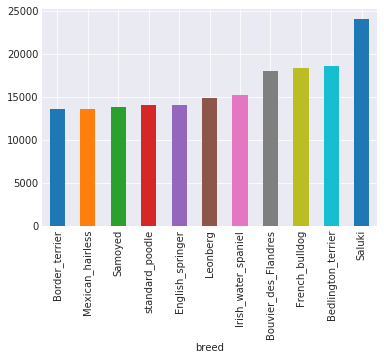

In [42]:
master_df.groupby(['breed']).favorite_count.mean().sort_values(ascending=False)[10::-1].plot(kind='bar')

#### seems the breed Saluki gets the highest favorite count

### 2- breed with highest retweet count

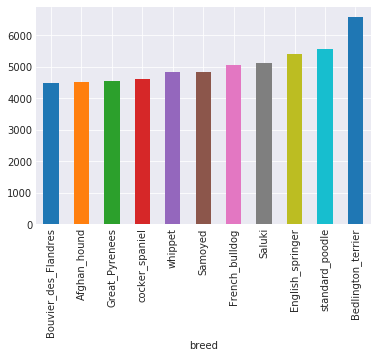

In [43]:
master_df.groupby(['breed']).retweet_count.mean().sort_values(ascending=False)[10::-1].plot(kind='bar')

#### seems the breed bedlington terrier gets the highest retweet count

### 3- Dog stage against retweet and favorite counts

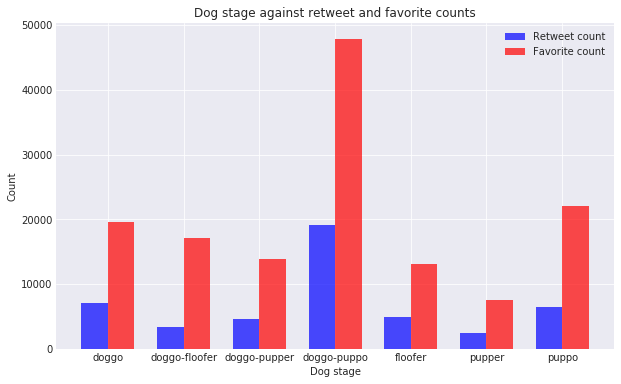

In [44]:
retweet_count = master_df.groupby('dog_stage').retweet_count.mean()
favorite_count = master_df.groupby('dog_stage').favorite_count.mean()

ind = np.arange(len(retweet_count))
width = 0.35
plt.subplots(figsize=(10,6))

red_bars = plt.bar(ind, retweet_count, width, color='b', alpha=.7, label='Retweet count')
white_bars = plt.bar(ind + width, favorite_count, width, color='r', alpha=.7, label='Favorite count')

plt.ylabel('Count')
plt.xlabel('Dog stage')
plt.title('Dog stage against retweet and favorite counts')
locations = ind + width / 2 
labels = retweet_count.index
plt.xticks(locations, labels)

plt.legend()

#### seems the doggo_puppo gets the highest counts